In [12]:
import missingno
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data_dir = pathlib.Path().absolute().parent.as_posix() + '/data/raw/train.csv'

df = pd.read_csv(data_dir)

In [14]:
df.sample(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
31087,0x85a6,VADRES19DEL01,33,3.7,22.311844,73.165081,22.381844,73.235081,25-03-2022,17:50:00,17:55:00,conditions Stormy,Medium,2,Meal,scooter,1,No,Metropolitian,(min) 32
8621,0x2491,COIMBRES20DEL03,32,4.5,10.994136,76.963303,11.024136,76.993303,03-03-2022,19:40:00,19:50:00,conditions Sunny,Jam,1,Snack,motorcycle,1,No,Metropolitian,(min) 23
25463,0x61a,RANCHIRES03DEL02,NaN,NaN,0.000000,0.000000,0.080000,0.080000,06-03-2022,NaN,18:05:00,conditions Sandstorms,Medium,2,Drinks,scooter,1,No,Urban,(min) 20


In [15]:
df.shape

(45593, 20)

In [16]:
# drop ID & Delivery_pperson_id

<font color = 'orange'>

#### <b> City
- handle NaN values
- handle extra space at suffix
- change data type

In [17]:
print(f"Unique Valeus: {df['City'].unique()} \n\nNaN Count: {df[df['City'] == 'NaN '].shape[0]} \n\nValue Count: {df['City'].value_counts()}")

Unique Valeus: ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'NaN '] 

NaN Count: 1200 

Value Count: City
Metropolitian     34093
Urban             10136
NaN                1200
Semi-Urban          164
Name: count, dtype: int64


In [18]:
# fix extra spaces
df['City'] = list(map(lambda x: x.strip(), df['City']))

df['City'].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', 'NaN'], dtype=object)

In [19]:
# fix 'NaN' with np.nan
df['City'] = df['City'].replace('NaN', np.nan)

In [20]:
df['City'].isnull().sum()

np.int64(1200)

In [21]:
# NaN replaced by mode
df['City'] = df['City'].fillna(value=df['City'].value_counts().index[0])

<font color = 'orange'>

#### <b> Festival
- handle NaN
- handle extra space at suffix
- change data type

In [22]:
print(f"Unique Valeus: {df['Festival'].unique()} \n\nNaN Count: {df[df['Festival'] == 'NaN '].shape[0]} \n\nValue Count: {df['Festival'].value_counts()}")

Unique Valeus: ['No ' 'Yes ' 'NaN '] 

NaN Count: 228 

Value Count: Festival
No      44469
Yes       896
NaN       228
Name: count, dtype: int64


In [23]:
# fix the extra space
df['Festival'] = list(map(lambda x: x.strip(), df['Festival']))
print(f"Unique value: {df['Festival'].unique()}")

# fix 'NaN' with np.nan
df['Festival'] = df['Festival'].replace('NaN', np.nan)
print(f"Value Count: {df['Festival'].isnull().sum()}")

Unique value: ['No' 'Yes' 'NaN']
Value Count: 228


In [24]:
# NaN replaced by mode of column
df['Festival'] = df['Festival'].fillna(df['Festival'].value_counts().index[0])

In [25]:
df['Festival'].value_counts()

Festival
No     44697
Yes      896
Name: count, dtype: int64

<font color = 'orange'>

#### <b> multiple_deliveries
- handle NaN
- change data type

In [26]:
df['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [27]:
df['multiple_deliveries'].value_counts()

multiple_deliveries
1       28159
0       14095
2        1985
NaN       993
3         361
Name: count, dtype: int64

In [28]:
# fix 'NaN ' with np.nan
df['multiple_deliveries'] = df['multiple_deliveries'].replace('NaN ', np.nan)
print(f"Value Count: {df['multiple_deliveries'].isnull().sum()}")

Value Count: 993


In [29]:
# fixing data type
df['multiple_deliveries'] = df['multiple_deliveries'].astype('Int64')

In [30]:
# as we dont have any clear explanation we'll convert 1,2,3 as 1 which means multiple deliveries
# and 0 means single delivery 
df['multiple_deliveries'] = df['multiple_deliveries'].apply(lambda x : x if x == 0 or np.isnan(x) else 1)

In [31]:
df['multiple_deliveries'].unique()

array([ 0.,  1., nan])

In [32]:
df['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    30505
0.0    14095
Name: count, dtype: int64

In [33]:
df['multiple_deliveries'].isna().sum()

np.int64(993)

In [34]:
df['multiple_deliveries'].fillna(value= 1, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_30040\1112967024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['multiple_deliveries'].fillna(value= 1, inplace=True)


In [35]:
df['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    31498
0.0    14095
Name: count, dtype: int64

<font color = 'orange'>

#### <b> Type_of_vehicle
- handle extra space at suffix
- change data type

In [36]:
df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [37]:
# fix the extra space
df['Type_of_vehicle'] = list(map(lambda x: x.strip(), df['Type_of_vehicle']))
print(f"Unique value: {df['Type_of_vehicle'].unique()}")

Unique value: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']


<font color = 'orange'>

#### <b> Type_of_order
- handle extra space at suffix
- change data type

In [38]:
df['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [39]:
# fix the extra space
df['Type_of_order'] = list(map(lambda x: x.strip(), df['Type_of_order']))
print(f"Unique value: {df['Type_of_order'].unique()}")

Unique value: ['Snack' 'Drinks' 'Buffet' 'Meal']


<font color = 'orange'>

#### <b> Road_traffic_density
- handle NaN
- handle extra space at suffix
- change data type

In [40]:
df['Road_traffic_density'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [41]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: count, dtype: int64

In [42]:
# fix the extra space
df['Road_traffic_density'] = list(map(lambda x: x.strip(), df['Road_traffic_density']))
print(f"Unique value: {df['Road_traffic_density'].unique()}")

# fix 'NaN' with np.nan
df['Road_traffic_density'] = df['Road_traffic_density'].replace('NaN', np.nan)
print(f"Value Count: {df['Road_traffic_density'].isnull().sum()}")

Unique value: ['High' 'Jam' 'Low' 'Medium' 'NaN']
Value Count: 601


In [43]:
df['Road_traffic_density'] = df['Road_traffic_density'].fillna(value='Low')

In [44]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low       16078
Jam       14143
Medium    10947
High       4425
Name: count, dtype: int64

<font color = 'orange'>

#### <b> Delivery_person_Rattings
- handle NaN
- change data type

In [45]:
df['Delivery_person_Ratings'].unique()

array(['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1',
       '5', '3.5', 'NaN ', '3.8', '3.9', '3.7', '2.6', '2.5', '3.6',
       '3.1', '2.7', '1', '3.2', '3.3', '6', '3.4', '2.8', '2.9', '3'],
      dtype=object)

In [46]:
df[df['Delivery_person_Ratings'] == 'NaN '].shape[0]

1908

In [47]:
# fixing data type
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float')

In [48]:
df['Delivery_person_Ratings'].isna().sum()

np.int64(1908)

In [49]:
print(f"Min: {df['Delivery_person_Ratings'].min()} \
      \nMax: {df['Delivery_person_Ratings'].max()} \
      \nMean: {df['Delivery_person_Ratings'].mean()} \
      \nMedian: {df['Delivery_person_Ratings'].median()}")

Min: 1.0       
Max: 6.0       
Mean: 4.633780473846858       
Median: 4.7


In [50]:
df[df['Delivery_person_Ratings'] > 5].shape[1]

20

[]

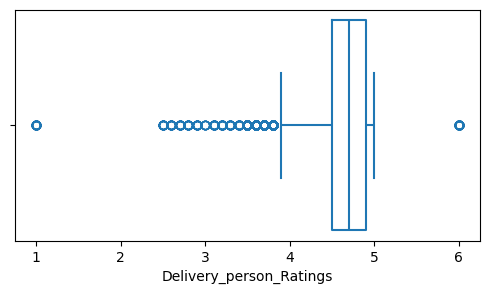

In [51]:
# box plot
plt.figure(figsize=(6, 3))
sns.boxplot(df, x=df["Delivery_person_Ratings"].astype("float"), fill=False)
plt.plot()

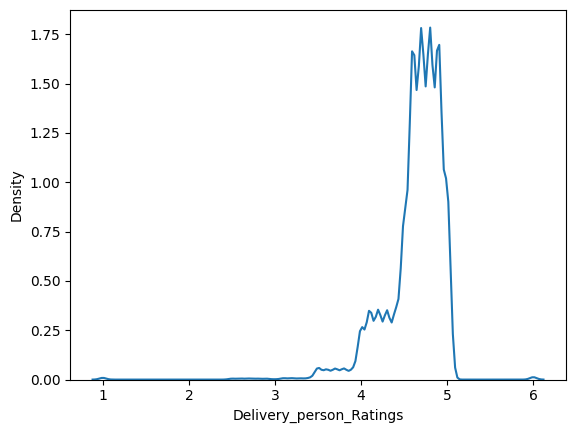

In [52]:
sns.kdeplot(df['Delivery_person_Ratings'])
plt.show()

In [53]:
# replace 6 ratting with median
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].replace(6, 4.7)

<font color = 'orange'>

#### <b> Delivery_person_Age
- handle NaN
- change data type

In [55]:
df['Delivery_person_Age'].unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 'NaN ', '28', '39', '30', '15',
       '50'], dtype=object)

In [56]:
# 'NaN ' is present in Delivery_person_Age column - 1854
df[df['Delivery_person_Age'] == 'NaN '].shape[0]

1854

In [57]:
# fixing NaN
df['Delivery_person_Age'] = df['Delivery_person_Age'].replace('NaN ', np.nan)

# fixing data type
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('Int64')

In [58]:
df['Delivery_person_Age'].isnull().sum()

np.int64(1854)

In [59]:
print(f"Min: {df['Delivery_person_Age'].min()} \
      \nMax: {df['Delivery_person_Age'].max()} \
      \nMean: {df['Delivery_person_Age'].mean()} \
      \nMedian: {df['Delivery_person_Age'].median()}")

Min: 15       
Max: 50       
Mean: 29.567136880129862       
Median: 30.0


[]

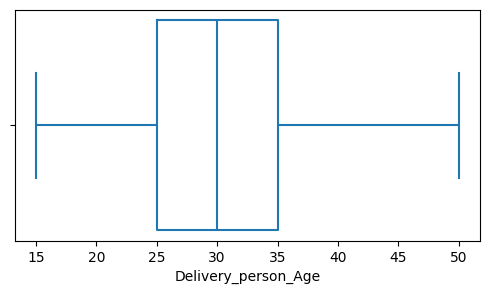

In [60]:
# box plot
plt.figure(figsize=(6, 3))
sns.boxplot(df, x=df["Delivery_person_Age"], fill=False)
plt.plot()

<font color = 'orange'>

#### <b> Weatherconditions
- handle Nan
- change data type

In [61]:
df['Weatherconditions'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [62]:
df['Weatherconditions'].value_counts()

Weatherconditions
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [63]:
df['Weatherconditions'].isnull().sum()

np.int64(0)

In [64]:
# fixing category names
df['Weatherconditions'] = df['Weatherconditions'].apply(lambda x: x.split(' ')[-1])

# fixing NaN
df['Weatherconditions'] = df['Weatherconditions'].replace('conditions NaN', np.nan)

In [65]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

In [66]:
# % of NaN values
round(df.isnull().mean() * 100, 2)

ID                             0.00
Delivery_person_ID             0.00
Delivery_person_Age            4.07
Delivery_person_Ratings        4.18
Restaurant_latitude            0.00
Restaurant_longitude           0.00
Delivery_location_latitude     0.00
Delivery_location_longitude    0.00
Order_Date                     0.00
Time_Orderd                    0.00
Time_Order_picked              0.00
Weatherconditions              0.00
Road_traffic_density           0.00
Vehicle_condition              0.00
Type_of_order                  0.00
Type_of_vehicle                0.00
multiple_deliveries            0.00
Festival                       0.00
City                           0.00
Time_taken(min)                0.00
dtype: float64

<Axes: >

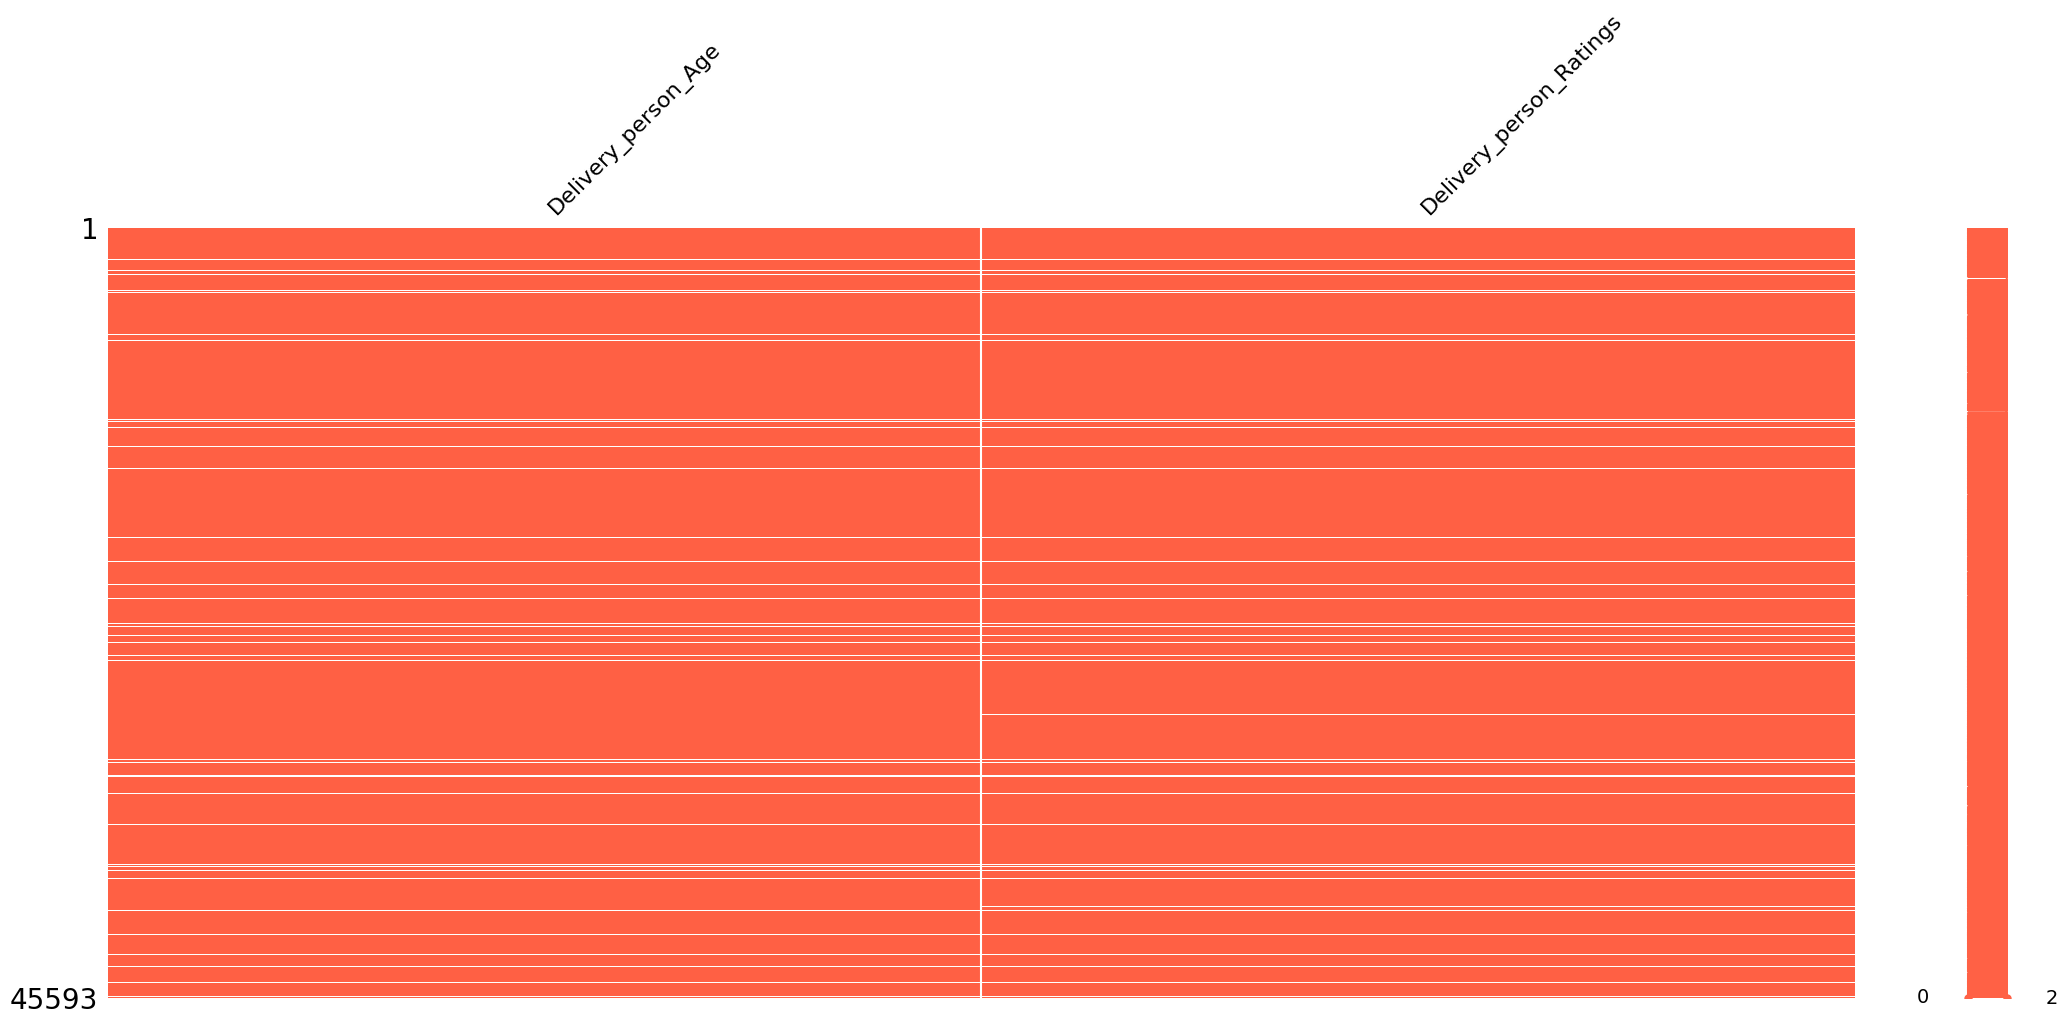

In [73]:
# Delivery_person_Age & Delivery_person_Ratting seems very correlated columns
%matplotlib inline
missingno.matrix(df.loc[:,['Delivery_person_Age', 'Delivery_person_Ratings']], color=(1, 0.38, 0.27))

<Axes: >

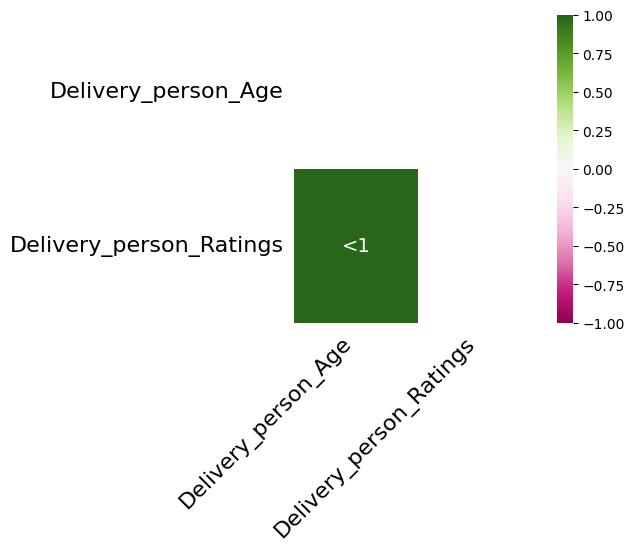

In [76]:
missingno.heatmap(df, cmap='PiYG', figsize=(4,4))

In [ ]:
# check for relationship b/w Delivery_person_Age & Delivery_person_Ratting

# Feature Engineering

"restaurant - delivery location" latitude & longitude
- Euclidean dist
- haversine dist
- manhattan dist
- estimate delivery time (assume 30 kmph)

time ordered & time order picked
- time lag
- ordered picked time ratio

order date
- hour
- day of week
- month
- quarter
- year